## Comparison of IC50 for original drug profiles and predicted

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

_FOLDER_2 = "results/"

#### All the data is in the Original_data_IC50s.csv
#### We need to remove the drug Camptothecin (drug_id =1003), as it was removed from publically available data

In [2]:
orig = pd.read_csv(_FOLDER_2+"Original_data_IC50s.csv")
orig = orig[orig["DRUG_ID"] !=0].copy()
orig.head()

,X,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,...,norm_cells_4,norm_cells_5,norm_cells_6,norm_cells_7,norm_cells_8,norm_cells_9,ID,orig_IC50,AbsoluteIC50_raw_conc_orig,AbsoluteIC50_raw_conc_pred
0,0,11,910706,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.821804,0.168625,0.024022,0.022098,0.024326,0.034276,11_910706,0.004411,0.005,0.004
1,1,11,905958,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.724836,0.235161,0.181743,0.111226,0.073724,0.048762,11_905958,0.005084,0.004,0.005
2,2,11,1322218,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.992225,0.843677,0.453642,0.305654,0.310520,0.280026,11_1322218,0.018034,0.012,0.004
3,3,11,907073,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.244568,0.042907,0.042843,0.028636,0.012637,0.011421,11_907073,0.002393,0.002,0.004
4,4,41,724872,5.1200,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.940754,0.952670,0.899147,0.468544,0.125940,0.111752,41_724872,1.370744,1.258,0.328


In [3]:
print(orig.shape)
orig.dropna(axis=0, inplace=True)
print(orig.shape)

(496, 28)
(488, 28)


In [4]:
col_to_use =["DRUG_ID", "COSMIC_ID", "orig_IC50", "AbsoluteIC50_raw_conc_orig",  "AbsoluteIC50_raw_conc_pred"]
orig[col_to_use].head()

,DRUG_ID,COSMIC_ID,orig_IC50,AbsoluteIC50_raw_conc_orig,AbsoluteIC50_raw_conc_pred
0,11,910706,0.004411,0.005,0.004
1,11,905958,0.005084,0.004,0.005
2,11,1322218,0.018034,0.012,0.004
3,11,907073,0.002393,0.002,0.004
4,41,724872,1.370744,1.258,0.328


In [5]:
orig["compare_lit_raw"] = orig["orig_IC50"] - orig["AbsoluteIC50_raw_conc_orig"]

orig["compare_raw_pred"] = orig["AbsoluteIC50_raw_conc_orig"] - orig["AbsoluteIC50_raw_conc_pred"]

orig["compare_lit_pred"] = orig["orig_IC50"] - orig["AbsoluteIC50_raw_conc_pred"]

In [6]:
compare_columns = ["compare_lit_raw", "compare_raw_pred", "compare_lit_pred"]
ic50_columns  =["orig_IC50", "AbsoluteIC50_raw_conc_orig",  "AbsoluteIC50_raw_conc_pred"]

In [7]:
# orig.groupby("DRUG_ID")[compare_columns + ic50_columns].agg([min, max, "count", "mean"])

orig[compare_columns + ic50_columns].describe()

,compare_lit_raw,compare_raw_pred,compare_lit_pred,orig_IC50,AbsoluteIC50_raw_conc_orig,AbsoluteIC50_raw_conc_pred
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,-0.350359,3.936873,3.586514,9.198137,9.548496,5.611623
std,7.507248,47.370097,44.168619,68.112303,71.830712,34.206819
min,-109.164446,-143.199000,-133.873546,0.000442,0.001000,0.001000
25%,-0.004833,-0.062000,-0.037852,0.055559,0.047000,0.051750
50%,0.005016,0.003000,0.008399,0.329945,0.301500,0.289500
75%,0.052301,0.186500,0.240306,0.865170,0.783250,0.711750
max,31.384876,553.855000,580.526876,816.852876,808.803000,265.152000


In [38]:
orig[compare_columns].describe()

,compare_lit_raw,compare_raw_pred,compare_lit_pred
count,488.000000,488.000000,488.000000
mean,-0.350359,3.936873,3.586514
std,7.507248,47.370097,44.168619
min,-109.164446,-143.199000,-133.873546
25%,-0.004833,-0.062000,-0.037852
50%,0.005016,0.003000,0.008399
75%,0.052301,0.186500,0.240306
max,31.384876,553.855000,580.526876


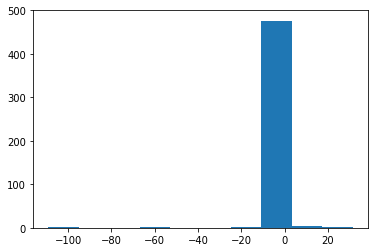

In [9]:
plt.hist(orig["compare_lit_raw"]);

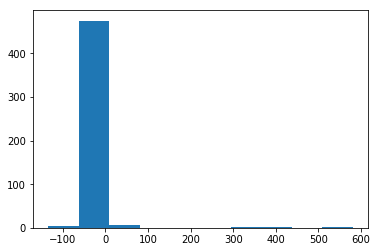

In [10]:
plt.hist(orig["compare_lit_pred"]);

### For what cases is it highest difference in literature data and IC50 estimation protocol?

In [11]:
orig[(orig["compare_lit_raw"]<-20)|(orig["compare_lit_raw"]>20)][["DRUG_ID", "COSMIC_ID"] +compare_columns + ic50_columns]

,DRUG_ID,COSMIC_ID,compare_lit_raw,compare_raw_pred,compare_lit_pred,orig_IC50,AbsoluteIC50_raw_conc_orig,AbsoluteIC50_raw_conc_pred
99,165,724859,31.384876,549.142,580.526876,816.852876,785.468,236.326
102,165,910849,-99.832773,161.649,61.816227,326.968227,426.801,265.152
103,165,906873,-109.164446,523.802,414.637554,612.238554,721.403,197.601
190,196,907796,-55.672096,390.106,334.433904,581.929904,637.602,247.496
256,245,907274,20.607358,4.602,25.209358,27.836358,7.229,2.627


### What is wrong with this data?

In [19]:
def show_one(df, drug_id, cosmic_id, response_norm, drug_names, show_predictions=False, 
             pred_response_norm= None, save_name=None):
    plt.figure(figsize=(4,3))
    conc_columns= ["fd_num_"+str(i) for i in range(10)]

    ind = df[(df["DRUG_ID"]==drug_id) &(df["COSMIC_ID"]==cosmic_id)].index
    x = df.loc[ind, conc_columns].values[0]
    y = df.loc[ind, response_norm].values[0]
    plt.scatter(x, y)
    plt.tick_params(labelsize=12)
    plt.xlabel("Scaled dosage", fontsize=12)
    plt.ylabel("Normalised response", fontsize=12)
    if show_predictions:
        y_pred = df.loc[ind, pred_response_norm].values[0]
        plt.scatter(x, y_pred)
        plt.legend(["original", "predicted"])   
    plt.title(drug_names[drug_id]+"_"+str(drug_id)+"_"+str(cosmic_id));
    
    if save_name:
        plt.savefig(_FOLDER_2+save_name+".png", bbox_inches='tight')
        
conc_columns= ["fd_num_"+str(i) for i in range(10)]                    
response_norm = ['norm_cells_'+str(i) for i in range(10)]
pred_response_norm = ['pred_norm_cells_'+str(i) for i in range(10)]

with open(_FOLDER_2+'all_drugs_names.pickle', 'rb') as handle:
    drug_names = pickle.load(handle)

165 724859


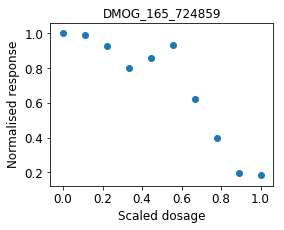

In [22]:
ind= 99
drug_id = orig.loc[ind, "DRUG_ID"]
cosmic_id = orig.loc[ind, "COSMIC_ID"]
print(drug_id, cosmic_id)
show_one(orig, drug_id =drug_id, cosmic_id= cosmic_id, response_norm= response_norm,drug_names=drug_names)

<Figure size 432x288 with 0 Axes>

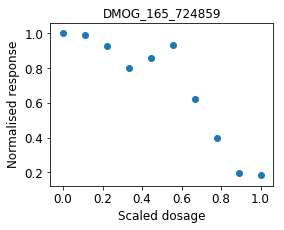

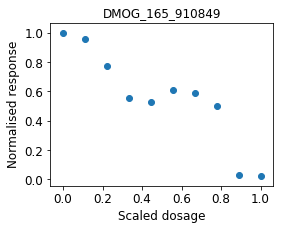

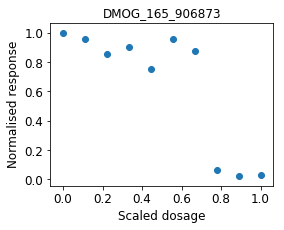

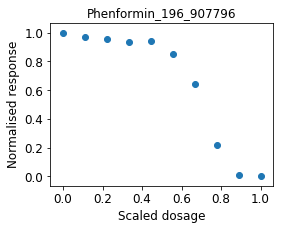

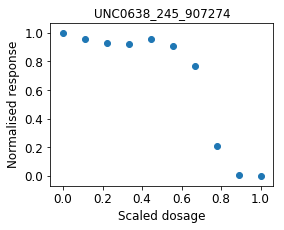

In [23]:
for i, ind in enumerate(orig[(orig["compare_lit_raw"]<-20)|(orig["compare_lit_raw"]>20)].index):
    plt.figure(i)
    drug_id = orig.loc[ind, "DRUG_ID"]
    cosmic_id = orig.loc[ind, "COSMIC_ID"]
    show_one(orig, drug_id =drug_id, cosmic_id= cosmic_id, response_norm= response_norm,drug_names=drug_names);
    

## How difference in IC50 values correlates with R2?

In [45]:
from all_functions import FittingColumn

orig["r2"], _ = FittingColumn(orig, orig.index, conc_columns, response_norm, "sigmoid_4_param")

100%|██████████| 488/488 [00:00<00:00, 610.94it/s]


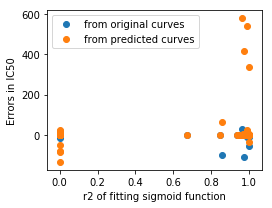

In [63]:
plt.figure(figsize=(4,3))
plt.scatter(orig["r2"], orig["compare_lit_raw"], label = "from original curves")
plt.scatter(orig["r2"], orig["compare_lit_pred"], label = "from predicted curves")
plt.xlabel("r2 of fitting sigmoid function")
plt.ylabel("Errors in IC50")
plt.legend()
plt.tight_layout()
plt.savefig("figures/IC50_errors");

In [52]:
orig[(orig["r2"]>0.9)&(orig["compare_lit_pred"]>100)]

,X,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,...,norm_cells_8,norm_cells_9,ID,orig_IC50,AbsoluteIC50_raw_conc_orig,AbsoluteIC50_raw_conc_pred,compare_lit_raw,compare_raw_pred,compare_lit_pred,r2
99,99,165,724859,4000.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.195070,0.184218,165_724859,816.852876,785.468,236.326,31.384876,549.142,580.526876,0.961956
103,103,165,906873,4000.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.025023,0.031097,165_906873,612.238554,721.403,197.601,-109.164446,523.802,414.637554,0.974983
188,188,196,910694,4000.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.024796,0.004005,196_910694,796.946062,808.803,254.948,-11.856938,553.855,541.998062,0.990924
190,190,196,907796,4000.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.008827,0.004446,196_907796,581.929904,637.602,247.496,-55.672096,390.106,334.433904,0.997185


In [54]:
orig["rel_lit_raw"] = (orig["orig_IC50"] -orig["AbsoluteIC50_raw_conc_orig"])/orig["orig_IC50"]
orig["rel_lit_pred"] = (orig["orig_IC50"] -orig["AbsoluteIC50_raw_conc_pred"])/orig["orig_IC50"]
orig[["rel_lit_raw","rel_lit_pred"]].describe()

,rel_lit_raw,rel_lit_pred
count,488.000000,488.000000
mean,0.069112,-0.094391
std,0.264145,0.957021
min,-1.264096,-6.039563
25%,-0.040833,-0.367287
50%,0.063482,0.143028
75%,0.188897,0.554514
max,0.917150,0.955460


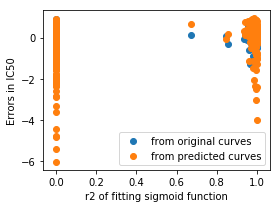

In [64]:
plt.figure(figsize=(4,3))
plt.scatter(orig["r2"], orig["rel_lit_raw"], label = "from original curves")
plt.scatter(orig["r2"], orig["rel_lit_pred"], label = "from predicted curves")
plt.xlabel("r2 of fitting sigmoid function")
plt.ylabel("Errors in IC50")
plt.legend()
plt.tight_layout()
plt.savefig("figures/IC50_errors");

In [43]:
orig["r2"] = r2_score_fitting(orig, conc_columns, response_norm 

,X,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,...,norm_cells_7,norm_cells_8,norm_cells_9,ID,orig_IC50,AbsoluteIC50_raw_conc_orig,AbsoluteIC50_raw_conc_pred,compare_lit_raw,compare_raw_pred,compare_lit_pred
0,0,11,910706,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.022098,0.024326,0.034276,11_910706,0.004411,0.005,0.004,-0.000589,0.001,0.000411
1,1,11,905958,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.111226,0.073724,0.048762,11_905958,0.005084,0.004,0.005,0.001084,-0.001,0.000084
2,2,11,1322218,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.305654,0.310520,0.280026,11_1322218,0.018034,0.012,0.004,0.006034,0.008,0.014034
3,3,11,907073,0.1024,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.028636,0.012637,0.011421,11_907073,0.002393,0.002,0.004,0.000393,-0.002,-0.001607
4,4,41,724872,5.1200,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.468544,0.125940,0.111752,41_724872,1.370744,1.258,0.328,0.112744,0.930,1.042744
5,5,41,910688,5.1200,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.070648,0.032652,0.024455,41_910688,2.175384,0.612,0.355,1.563384,0.257,1.820384
6,6,41,909976,5.1200,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.480987,0.307208,0.285638,41_909976,1.588416,1.304,0.342,0.284416,0.962,1.246416
7,7,41,910918,5.1200,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.548889,0.376675,0.368236,41_910918,2.047702,1.462,0.343,0.585702,1.119,1.704702
8,8,41,910710,5.1200,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.116035,0.104520,0.114787,41_910710,0.459290,0.445,0.267,0.014290,0.178,0.192290
9,9,45,1331034,2.5600,0,0.111111,0.222222,0.333333,0.444444,0.555556,...,0.499741,0.014576,0.010252,45_1331034,0.635085,0.642,0.126,-0.006915,0.516,0.509085


### Will these odd samples stay if we apply improved filtration?

In [31]:
from all_functions import DataPreprocessing

In [34]:
s1= DataPreprocessing(folder_with_original_data = "data/", folder_with_results= "results/", 
                      filtering_scenario = [1,2,3,4],
                      first_points_lower_limit = 0.8, last_points_upper_limit = 0.4,
                      middle_points_limit =-0.1,
                     fitting_function = "sigmoid_4_param", 
                     print_progress_info = False,
                     keep_r2_column = False)
s1.shape

100%|██████████| 2600/2600 [00:03<00:00, 692.31it/s]


(2447, 1370)

In [35]:
s2= DataPreprocessing(folder_with_original_data = "data/", folder_with_results= "results/", 
                      filtering_scenario = [1,2,3,4],
                      first_points_lower_limit = 0.8, last_points_upper_limit = 0.4,
                      middle_points_limit =-0.2,
                     fitting_function = "sigmoid_4_param", 
                     print_progress_info = False,
                     keep_r2_column = False)
s2.shape

100%|██████████| 2719/2719 [00:04<00:00, 678.11it/s]


(2560, 1370)

In [37]:
for ind_pair in orig[(orig["compare_lit_raw"]<-20)|(orig["compare_lit_raw"]>20)].set_index(["DRUG_ID", "COSMIC_ID"]).index:
    print(ind_pair)
    print("in sigmoid_01:", ind_pair in s1.index)
    print("in sigmoid_02:", ind_pair in s2.index)
    display(s1.loc[ind_pair, :])
    display(s2.loc[ind_pair, :])

(165, 724859)
in sigmoid_01: False
in sigmoid_02: False


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
165,167.0,906848.0,16.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
724859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
165,1149.0,907313.0,5.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
724859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(165, 910849)
in sigmoid_01: False
in sigmoid_02: False


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
165,167.0,906848.0,16.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
910849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
165,1149.0,907313.0,5.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
910849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(165, 906873)
in sigmoid_01: False
in sigmoid_02: False


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
165,167.0,906848.0,16.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
906873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
165,1149.0,907313.0,5.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(196, 907796)
in sigmoid_01: False
in sigmoid_02: False


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
196,272.0,910554.0,5.12,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
196,167.0,905952.0,16.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
907796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(245, 907274)
in sigmoid_01: False
in sigmoid_02: False


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
245,283.0,753577.0,0.128,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
907274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DRUG_ID,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,JNK and p38 signaling,Metabolism,Mitosis,Other,"Other, kinases",PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
245,293.0,908481.0,20.0,0.0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
907274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = orig[(orig["compare_raw_pred"]<0.1) | (orig["compare_raw_pred"]>0.3)][
    ["DRUG_ID", "COSMIC_ID"] +compare_columns + ic50_columns]
df2.head()

In [ ]:
plt.scatter(df2["compare_lit_raw"], df2["compare_lit_pred"])
plt.xlabel("Difference between literature data and IC50 protocol")
plt.ylabel("Difference between literature data and predictions");

## Comaprison of Original_data_IC50s.csv and predicted_data_IC50s.csv

In [ ]:
pred =pd.read_csv(_FOLDER_2+"Predicted_data_IC50s.csv")
pred[col_to_use].head()

In [ ]:
pred.columns

In [ ]:
df= pd.merge(left=orig[col_to_use], right = pred[col_to_use], how="left", on= ["DRUG_ID", "COSMIC_ID"])
df.head()

In [ ]:
# compare tables
ic50_columns = ["orig_IC50", "AbsoluteIC50_raw_conc_orig",  "AbsoluteIC50_raw_conc_pred"]
df2 = df[df["orig_IC50_x"].notnull()].copy()
for col in ic50_columns:
    df["compare_"+col]= np.where(df[col+"_x"]==df[col+"_y"], 0,1)
    df2["compare_"+col]= np.where(df2[col+"_x"]==df2[col+"_y"], 0,1)
    print("Column %s: Number of not equal records: %d" % (col,df2["compare_"+col].sum()))

In [ ]:
df2[df2["compare_orig_IC50"]!=0]

In [ ]:
df[df['DRUG_ID']==1003]

In [ ]:
with open(_FOLDER_2+"all_drugs_names.pickle", 'rb') as handle:
    drug_names = pickle.load(handle)

In [ ]:
drug_names[1003]

In [ ]:
import matplotlib.pyplot as plt

def show_one(df, drug_id, cosmic_id, response_norm, show_predictions=False, pred_response_norm= None, save_name=None):
    plt.figure(figsize=(4,3))
    conc_columns= ["fd_num_"+str(i) for i in range(10)]

    ind = df[(df["DRUG_ID"]==drug_id) &(df["COSMIC_ID"]==cosmic_id)].index
    x = df.loc[ind, conc_columns].values[0]
    y = df.loc[ind, response_norm].values[0]
    plt.scatter(x, y)
    plt.tick_params(labelsize=12)
    plt.xlabel("Scaled dosage", fontsize=12)
    plt.ylabel("Normalised response", fontsize=12)
    if show_predictions:
        y_pred = df.loc[ind, pred_response_norm].values[0]
        plt.scatter(x, y_pred)
        plt.legend(["original", "predicted"])   
    plt.title(drug_names[drug_id]+"_"+str(cosmic_id));
    
    if save_name:
        plt.savefig(_FOLDER_2+save_name+".png", bbox_inches='tight')
        
conc_columns= ["fd_num_"+str(i) for i in range(10)]                    
response_norm = ['norm_cells_'+str(i) for i in range(10)]
pred_response_norm = ['pred_norm_cells_'+str(i) for i in range(10)]

In [ ]:
show_one(orig, drug_id =1003, cosmic_id= 909712, response_norm= response_norm)

In [ ]:
for col in pred_response_norm:
    orig[col] = pred[col]
    
show_one(orig, drug_id =1003, cosmic_id= 909712, response_norm= response_norm, pred_response_norm = pred_response_norm, show_predictions= True)

### Remove the drug Camptothecin (drug_id =1003), as it was removed from publically available data

In [ ]:
### All the data is in the orig

In [ ]:
df = df[df["DRUG_ID"] != 1003].copy()